In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import sys
# sys.path.insert(0, '../System')

# from classify import get_feature_table, get_feature_groups, train_classify, group_classify, train_model, test_model
# from classify import create_classification_table, create_crossval_table, create_fake_crossval_table

import pickle

CLF = LogisticRegression()

Load in the tuned classifier

In [ ]:
with open("../System/clfs/standard_linear_svc.sav", 'rb') as file:
    tuned_clf = pickle.load(file)

Cross Val Score (tuned)

In [ ]:
cv_tuned = train_classify(['feats'], tuned_clf)

CV Score (untuned)

In [ ]:
cv_untuned = train_classify(['feats'], CLF)

Confusion Matrix

In [ ]:
conf = train_classify(['feats'], CLF, confusion=True)

Group Scores

In [ ]:
group_scores = group_classify(CLF)
group_scores

In [ ]:
print(group_scores.round(3).to_latex())

Performance of just Complexity & Detail Features

In [ ]:
complex_detail = train_classify(['feats'], CLF, groups=['complexity', 'details'])

Cross val score of feats for fake news

In [ ]:
cv_fake = train_classify(['fake_news_feats'], CLF, confusion=True)

In [ ]:
complex_detail = train_classify(['fake_news_feats'], CLF, groups=['complexity', 'details'])

Train on April Fools and test on Fake News with hoax set

In [ ]:
af_trained_model = train_model(['feats'], CLF)
af_fake = test_model(['fake_news_feats'], af_trained_model)

Cross val score of BoW for fake news

In [ ]:
cv_fake = train_classify(['fake_news_bow'], CLF, confusion=True)

Train on AF and test on FN with BoW

In [ ]:
af_trained_model = train_model(['bow'], CLF)
af_fake = test_model(['fake_news_bow'], af_trained_model)

Train on AF and test on FN with BoPoS

In [ ]:
af_trained_model = train_model(['bop'], CLF)
af_fake = test_model(['fake_news_bop'], af_trained_model)

In [ ]:
print("\nBag-of-PoS\n---------------")
train_classify(['bop'], CLF, confusion=True)
print("\nFeats\n---------------")
train_classify(['feats'], CLF, confusion=True)
print("\nFunction Words\n---------------")
train_classify(['function_words'], CLF, confusion=True)
print("\nBag-of-PoS + Function Words\n---------------")
train_classify(['bop', 'function_words'], CLF, confusion=True)


Get Results Table

In [ ]:
crossval_table = create_crossval_table(classifier=CLF)

In [ ]:
crossval_table = crossval_table.round(3)

In [ ]:
print(crossval_table.loc[:, crossval_table.columns != 'accuracy'].to_latex())

In [ ]:
fake_results = create_fake_crossval_table(classifier=LogisticRegression()).round(3)
print(fake_results.loc[:, fake_results.columns != 'accuracy'].to_latex())

Make Cross Val Table for Paper

In [ ]:
accs_af = crossval_table.loc[:, crossval_table.columns == 'accuracy']
accs_af.columns = ["April Fools"]

accs_af = accs_af.drop(['top_6', 'all', 'bow', 'bow + feats', 'bop', 'function_words'])
accs_af.index = ['Complexity', 'Deception', 'Details', 'Formality', 'Humour', 'Imagination',
                'Vagueness', 'Hoax Set', 'Complex-Detail', 'Selection', 'PoS + Func Words']
accs_af

In [ ]:
accs_fake = fake_results.loc[:, fake_results.columns == 'accuracy']
accs_fake.columns = ['Fake News']

accs_fake = accs_fake.drop(['top_6','fake_news_bow', 'bow + feats', 'fake_news_bop', 'fake_news_function_words'])
accs_fake.index = ['Complexity', 'Deception', 'Details', 'Formality', 'Humour', 'Imagination',
                'Vagueness', 'Hoax Set', 'Complex-Detail', 'Selection', 'PoS + Func Words']

accs_fake

In [ ]:
print(pd.concat([accs_af, accs_fake], axis=1).to_latex())

Make the cross validation chart!

In [4]:
pipeline = Pipeline([
            ('normalizer', StandardScaler()),           # Step1 - normalize data
            ('clf', LogisticRegression())               # Step2 - classifier
            ])

scoring = ['accuracy']

In [5]:
feats = pd.read_csv("../System/feats_train.csv")
feats.set_index('index', inplace=True)
af_labels = feats["class"]
feats.drop('class', axis=1, inplace=True)

bow = pd.read_csv("../System/bow_train.csv")
bow.set_index('index', inplace=True)
bow.drop('class', axis=1, inplace=True)

bop = pd.read_csv("../System/bop_train.csv")
bop.set_index('index', inplace=True)
bop.drop('class', axis=1, inplace=True)

fun = pd.read_csv("../System/function_words_train.csv")
fun.set_index('index', inplace=True)
fun.drop('class', axis=1, inplace=True)

fakes = pd.read_csv("../System/fake_news_feats_train.csv")
fakes.set_index('index', inplace=True)
fake_labels = fakes["class"]
fakes.drop('class', axis=1, inplace=True)

fake_bow = pd.read_csv("../System/fake_news_bow_train.csv")
fake_bow.set_index('index', inplace=True)
fake_bow.drop('class', axis=1, inplace=True)

fake_bop = pd.read_csv("../System/fake_news_bop_train.csv")
fake_bop.set_index('index', inplace=True)
fake_bop.drop('class', axis=1, inplace=True)

fake_fun = pd.read_csv("../System/fake_news_function_words_train.csv")
fake_fun.set_index('index', inplace=True)
fake_fun.drop('class', axis=1, inplace=True)

Build the dictionary of feature tables.

In [6]:
feature_set_names = ['complexity', 'deception', 'details', 'formality', 'humour', 'imagination', 'vagueness']

# This is the old list of selection features.
# selection_feats = ['avg_sentence_len', 'body_punctuation', 'readability', 'lexical_diversity',
#                    'fp_pronouns', 'time_related', 'sense_words', 'proper_nouns', 'ap_date',
#                    'ap_num', 'preposition', 'adjectives', 'ima_conjunctions', 'degree_adverbs']

selection_feats = ['avg_sentence_len', 'body_punctuation', 'lexical_diversity', 'fp_pronouns', 
                   'time_related', 'sense_words', 'proper_nouns', 'dates', 'ap_title', 'ap_date',
                   'ap_num', 'alliteration', 'preposition', 'adjectives', 'ima_determiners', 
                   'inf_verb', 'usas_ambiguity']

feature_sets = dict()

for name in feature_set_names:
    curr = []
    with open("feature_sets/{}.txt".format(name)) as file:
        for line in file:
            if '-' not in line:
                curr.append(line.strip())
    feature_sets[name] = curr

Build AF Feature Tables

In [7]:
af_feature_tables = dict()
af_scores = dict()

for name in feature_set_names:
    af_feature_tables[name] = feats.loc[:, feature_sets[name]]
    
af_feature_tables['Hoax Set'] = feats
af_feature_tables['Complexity + Detail'] = pd.concat([af_feature_tables['complexity'],
                                                     af_feature_tables['details']], axis=1)
# af_feature_tables['Selection'] = feats.loc[:, selection_feats]
af_feature_tables['Bag-of-PoS'] = bop
# af_feature_tables['BoPoS + Func Words'] = pd.concat([fun, bop], axis=1)
af_feature_tables['BoPoS + Hoax'] = pd.concat([feats, bop], axis=1)
    
for name in af_feature_tables.keys():
    pipeline = Pipeline([
            ('normalizer', StandardScaler()),           # Step1 - normalize data
            ('clf', LogisticRegression())               # Step2 - classifier
            ])
    af_scores[name] = cross_validate(pipeline, af_feature_tables[name],
                                 af_labels, scoring=scoring, cv=10)

Build Fake News Feature Tables

In [8]:
def train_af_test_fake(af_table, fake_table, training_labels, testing_labels):
    classifier = LogisticRegression()
    scaler = StandardScaler()
    scaled_af = scaler.fit_transform(af_table)
    classifier.fit(scaled_af, training_labels)
    scaled_fake = scaler.transform(fake_table)
    predicted = classifier.predict(scaled_fake)
    return metrics.accuracy_score(testing_labels, predicted)

In [9]:
fake_feature_tables = dict()
fake_scores = dict()
fake_trained_on_af = dict()

for name in feature_set_names:
    fake_feature_tables[name] = fakes.loc[:, feature_sets[name]]
    
fake_feature_tables['Hoax Set'] = fakes
fake_feature_tables['Complexity + Detail'] = pd.concat([fake_feature_tables['complexity'],
                                                     fake_feature_tables['details']], axis=1)
# fake_feature_tables['Selection'] = fakes.loc[:, selection_feats]
fake_feature_tables['Bag-of-PoS'] = fake_bop
# fake_feature_tables['BoPoS + Func Words'] = pd.concat([fake_fun, fake_bop], axis=1)
fake_feature_tables['BoPoS + Hoax'] = pd.concat([fakes, fake_bop], axis=1)
    
for name in fake_feature_tables.keys():
    pipeline = Pipeline([
            ('normalizer', StandardScaler()),           # Step1 - normalize data
            ('clf', LogisticRegression())               # Step2 - classifier
            ])
    fake_scores[name] = cross_validate(pipeline, fake_feature_tables[name],
                                 fake_labels, scoring=scoring, cv=10)
    fake_trained_on_af[name] = train_af_test_fake(af_feature_tables[name],
                                                 fake_feature_tables[name],
                                                 af_labels, fake_labels)

Get Cross-Val Scores

In [10]:
af_test_scores = dict()
for name in af_feature_tables.keys():
    af_test_scores[name] = af_scores[name]['test_accuracy']
    
af_test_pd = pd.DataFrame(af_test_scores)

fake_test_scores = dict()
for name in fake_feature_tables.keys():
    fake_test_scores[name] = fake_scores[name]['test_accuracy']
    
fake_test_pd = pd.DataFrame(fake_test_scores)

In [11]:
fake_trained_on_af["Bag-of-PoS"]

0.649402390438247

Plot AF Graph

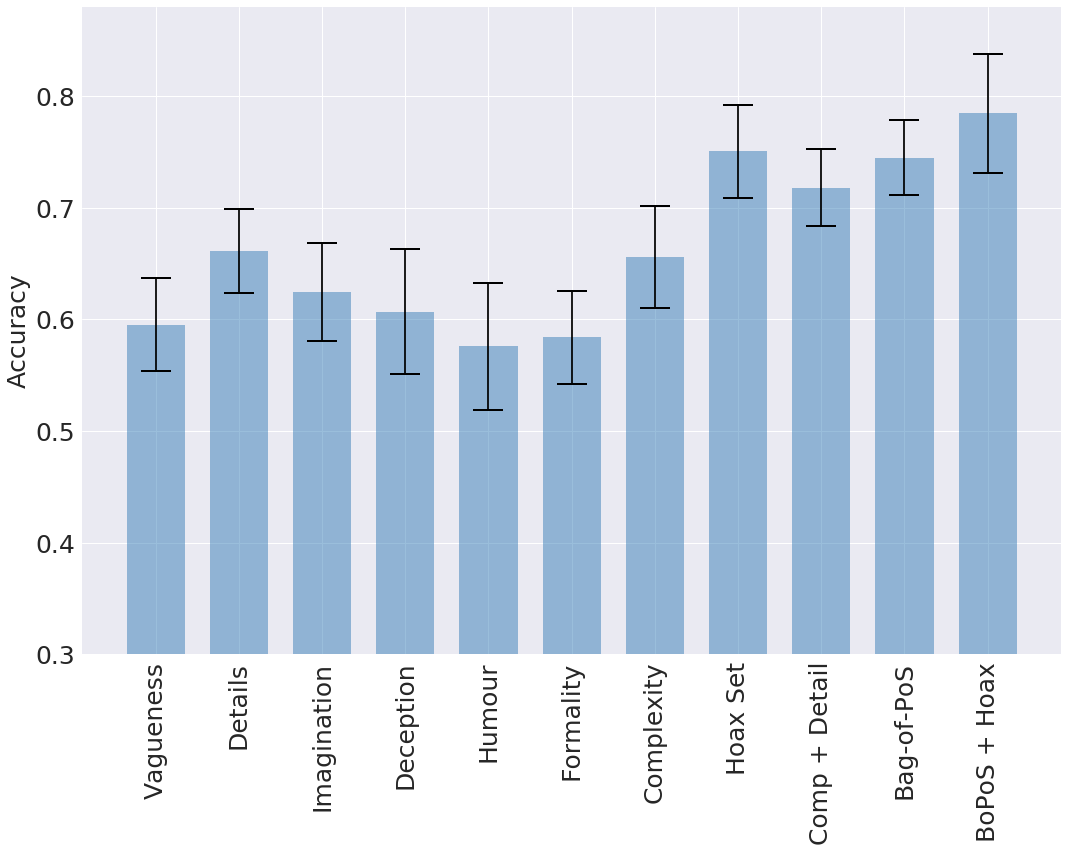

In [12]:
fig, ax = plt.subplots(figsize=(15, 12))
x_pos = np.arange(len(af_test_pd.columns))

sorted_names = ['vagueness', 'details', 'imagination', 'deception', 'humour', 'formality',
               'complexity', 'Hoax Set', 'Complexity + Detail',
                'Bag-of-PoS', 'BoPoS + Hoax']
sorted_means = [af_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [af_test_pd.std()[name] for name in sorted_names]

axis_labels = ['Vagueness', 'Details', 'Imagination', 'Deception', 'Humour', 'Formality', 
                'Complexity', 'Hoax Set', 'Comp + Detail',
                'Bag-of-PoS', 'BoPoS + Hoax']

col_width = 0.7

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
ax.bar(x=x_pos, height=sorted_means, width=col_width, 
       align='center', alpha=0.5, color="#377eb8")

(_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
                            capsize=15, color='#000000', fmt='x')
for cap in caps:
    cap.set_color('#000000')
    cap.set_markeredgewidth(2)

ax.set_xticks(x_pos)
ax.set_xticklabels(axis_labels, rotation='vertical')
ax.set_ylim(ymin=0.3)
ax.set_ylabel("Accuracy")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('Accuracy', fontsize=25)

plt.tight_layout()
plt.show()
fig.savefig("graphs/af_results.pdf", bbox_inches='tight')

In [13]:
af_test_pd.mean()

Bag-of-PoS             0.744627
BoPoS + Hoax           0.784257
Complexity + Detail    0.717760
Hoax Set               0.750452
complexity             0.655939
deception              0.606806
details                0.660916
formality              0.583842
humour                 0.575924
imagination            0.624265
vagueness              0.595268
dtype: float64

Plot Fake News Graph

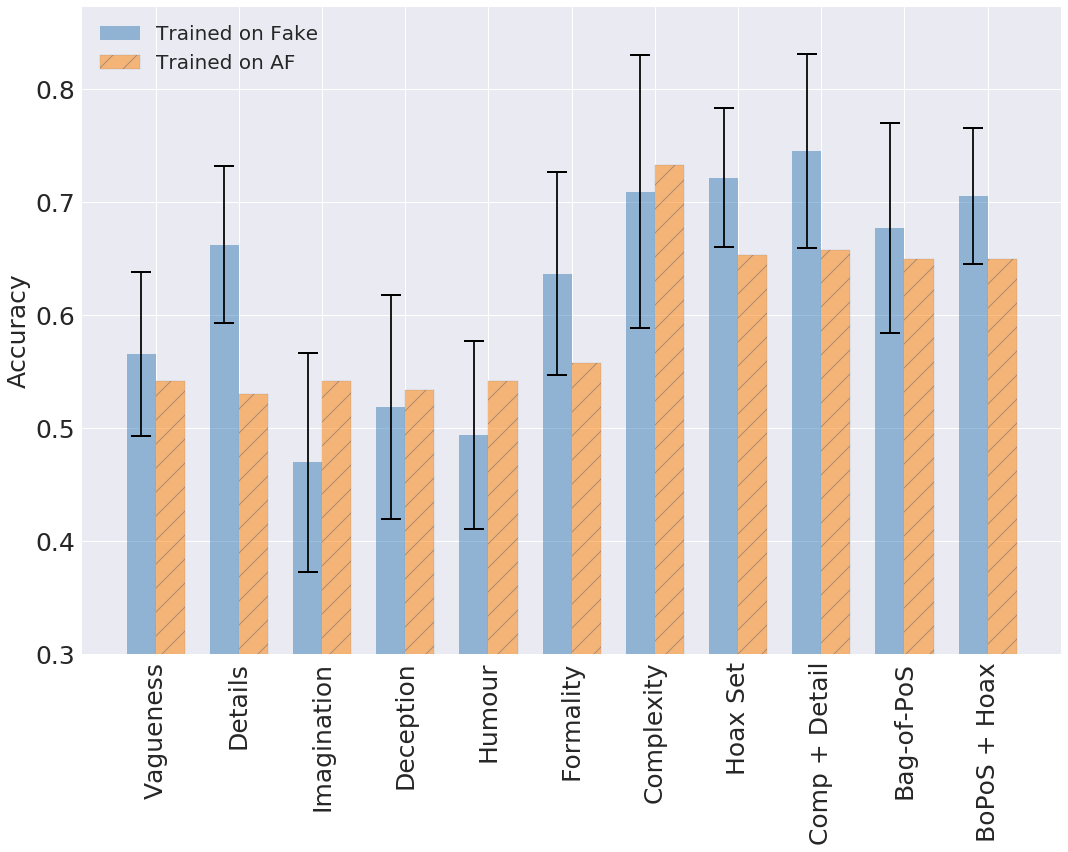

In [28]:
fig, ax = plt.subplots(figsize=(15, 12))
x_pos = np.arange(len(af_test_pd.columns))

sorted_names = ['vagueness', 'details', 'imagination', 'deception', 'humour', 'formality',
               'complexity', 'Hoax Set', 'Complexity + Detail',
                'Bag-of-PoS','BoPoS + Hoax']
sorted_means = [fake_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [fake_test_pd.std()[name] for name in sorted_names]
sorted_af_fake = [fake_trained_on_af[name] for name in sorted_names]

axis_labels = ['Vagueness', 'Details', 'Imagination', 'Deception', 'Humour', 'Formality', 
                'Complexity', 'Hoax Set', 'Comp + Detail',
                'Bag-of-PoS', 'BoPoS + Hoax']

col_width = 0.35

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
bar1 = ax.bar(x=x_pos, height=sorted_means, width=col_width,
       align='center', alpha=0.5, color="#377eb8")

bar2 = ax.bar(x=x_pos+col_width, height=sorted_af_fake, width=col_width,
       align='center', alpha=0.5, color="#ff7f00", hatch='/', edgecolor="#636363")

(_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
                            capsize=10, color='#000000', fmt='x')
for cap in caps:
    cap.set_color('#000000')
    cap.set_markeredgewidth(2)

ax.set_xticks(x_pos+col_width/2)
ax.set_xticklabels(axis_labels, rotation='vertical')
ax.set_ylim(ymin=0.3)
ax.set_ylabel("Accuracy")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('Accuracy', fontsize=25)

ax.legend((bar1, bar2), ("Trained on Fake", "Trained on AF"), prop={'size': 20})

plt.tight_layout()
plt.show()
fig.savefig("graphs/fake_results.pdf", bbox_inches='tight')

In [15]:
fake_test_pd.mean()

Bag-of-PoS             0.677205
BoPoS + Hoax           0.705526
Complexity + Detail    0.745269
Hoax Set               0.721705
complexity             0.709231
deception              0.518603
details                0.662436
formality              0.636679
humour                 0.494308
imagination            0.469782
vagueness              0.565718
dtype: float64

In [16]:
fake_trained_on_af

{'complexity': 0.7330677290836654,
 'deception': 0.5338645418326693,
 'details': 0.5298804780876494,
 'formality': 0.5577689243027888,
 'humour': 0.5418326693227091,
 'imagination': 0.5418326693227091,
 'vagueness': 0.5418326693227091,
 'Hoax Set': 0.6533864541832669,
 'Complexity + Detail': 0.6573705179282868,
 'Bag-of-PoS': 0.649402390438247,
 'BoPoS + Hoax': 0.649402390438247}

In [ ]:
af_test_pd

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

field_names = ['Hoax Set', 'Complexity + Detail',
                'Bag-of-PoS']

sorted_means = [af_test_pd.mean()[name] for name in field_names]
sorted_stds = [af_test_pd.std()[name] for name in field_names]

x_pos = np.arange(len(sorted_means))

axis_labels = ['Hoax Set', 'Complexity + Detail',
                'Bag-of-PoS']

col_width = 0.35

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
ax.bar(x=x_pos, height=sorted_means, width=col_width, 
       align='center', alpha=0.5, color="#377eb8")

# (_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
#                             capsize=15, color='#000000', fmt='x')
# for cap in caps:
#     cap.set_color('#000000')
#     cap.set_markeredgewidth(2)

ax.set_xticks(x_pos)
ax.set_xticklabels("")
ax.set_ylim(ymin=0.45)
ax.set_ylabel("")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('', fontsize=25)

plt.tight_layout()
plt.show()
fig.savefig("graphs/af_min_results.pdf", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

sorted_names = ['Hoax Set', 'Complexity + Detail',
                'Bag-of-PoS']
sorted_means = [fake_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [fake_test_pd.std()[name] for name in sorted_names]
sorted_af_fake = [fake_trained_on_af[name] for name in sorted_names]

x_pos = np.arange(len(sorted_means))

axis_labels = ['Hoax Set', 'Comp + Detail',
                'Bag-of-PoS']

col_width = 0.35

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
bar1 = ax.bar(x=x_pos, height=sorted_means, width=col_width,
       align='center', alpha=0.5, color="#377eb8")

bar2 = ax.bar(x=x_pos+col_width, height=sorted_af_fake, width=col_width,
       align='center', alpha=0.5, color="#ff7f00")

# (_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
#                             capsize=10, color='#000000', fmt='x')
# for cap in caps:
#     cap.set_color('#000000')
#     cap.set_markeredgewidth(2)

ax.set_xticks(x_pos+col_width/2)
ax.set_xticklabels("")
ax.set_ylim(ymin=0.45)
ax.set_ylabel("")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('', fontsize=25)

ax.legend((bar1, bar2), ("Trained on Fake", "Trained on AF"), prop={'size': 20})

plt.tight_layout()
plt.show()
fig.savefig("graphs/fake_min_results.pdf", bbox_inches='tight')

Plot the CL Graph

In [ ]:
# This graph is only feature groups and feats.
fig, ax = plt.subplots(figsize=(15, 12))

sorted_names = ['vagueness', 'details', 'imagination', 'deception', 'humour', 'formality',
               'complexity', 'Hoax Set', 'Complexity + Detail']
sorted_means = [af_test_pd.mean()[name] for name in sorted_names]
sorted_stds = [af_test_pd.std()[name] for name in sorted_names]

axis_labels = ['Vagueness', 'Details', 'Imagination', 'Deception', 'Humour', 'Formality', 
                'Complexity', 'Hoax Set', 'Comp + Detail']

x_pos = np.arange(len(sorted_names))

col_width = 0.7

# cv_scores.plot.bar(ax=ax, yerr=cv_stds, capsize=10)
ax.bar(x=x_pos, height=sorted_means, width=col_width, 
       align='center', alpha=0.5, color="#377eb8")

(_, caps, _) = plt.errorbar(x=x_pos, y=sorted_means, yerr=sorted_stds,
                            capsize=15, color='#000000', fmt='x')
for cap in caps:
    cap.set_color('#000000')
    cap.set_markeredgewidth(2)

ax.set_xticks(x_pos)
ax.set_xticklabels(axis_labels, rotation='vertical')
ax.set_ylim(ymin=0.3)
ax.set_ylabel("Accuracy")
ax.yaxis.grid(True)

ax.tick_params(labelsize=25)
ax.set_ylabel('Accuracy', fontsize=25)

plt.tight_layout()
plt.show()
fig.savefig("graphs/CL2019_Graph.pdf", bbox_inches='tight')